In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%R

require('tidyverse')
require('ggrepel')
require('ggpubr')
require('broom')
require('AICcmodavg')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: ggrepel

R[write to console]: Loading required package: ggpubr

R[write to console]: Loading required package: broom

R[write to console]: Loading required package: AICcmodavg



In [3]:
# read csv
# df = pd.read_csv('data_cleaned.csv')
# df

In [4]:
pip install fastparquet



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# save df to parquet

# df.to_parquet('data_cleaned.parquet')

In [6]:
df = pd.read_parquet('data_cleaned.parquet')
df

,zip,borough,complaints_2020,complaints_2021,complaints_2022,pop_2020,pop_2021,pop_2022,med_inc_2020,med_inc_2021,med_inc_2022,complaints_norm_2020,complaints_norm_2021,complaints_norm_2022
0,10001,MANHATTAN,289,330,396,25026,26966,26966,96787,101409,101409,1154.799009,1223.763257,1468.515909
1,10002,MANHATTAN,1067,1277,1905,74363,76807,76807,35607,37093,37093,1434.853354,1662.608877,2480.242686
2,10003,MANHATTAN,824,1400,1298,54671,54447,54447,129981,137533,137533,1507.197600,2571.307877,2383.969732
3,10004,MANHATTAN,8,10,15,3310,4795,4795,204949,216017,216017,241.691843,208.550574,312.825860
4,10005,MANHATTAN,3,7,17,8664,8637,8637,184681,197188,197188,34.626039,81.046660,196.827602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11436,QUEENS,121,158,173,18955,21248,21248,72962,78306,78306,638.353996,743.599398,814.194277
176,11691,QUEENS,910,1159,1619,68454,70797,70797,52605,54877,54877,1329.359862,1637.075017,2286.820063
177,11692,QUEENS,287,319,470,22394,24639,24639,53077,53498,53498,1281.593284,1294.695402,1907.544949
178,11693,QUEENS,42,117,146,13029,14147,14147,52946,64688,64688,322.357817,827.030466,1032.020923


In [7]:

df.groupby('borough').complaints_2020.sum().sort_values(ascending=False)


borough
BRONX            59145
BROOKLYN         46011
MANHATTAN        36126
QUEENS           22053
STATEN ISLAND     1653
Name: complaints_2020, dtype: int64

In [8]:
df.dtypes

zip                       int64
borough                  object
complaints_2020           int64
complaints_2021           int64
complaints_2022           int64
pop_2020                  int64
pop_2021                  int64
pop_2022                  int64
med_inc_2020              int64
med_inc_2021              int64
med_inc_2022              int64
complaints_norm_2020    float64
complaints_norm_2021    float64
complaints_norm_2022    float64
dtype: object

In [9]:
# remove decimals
df['complaints_norm_2020'] = df['complaints_norm_2020'].astype(int)
df['complaints_norm_2021'] = df['complaints_norm_2021'].astype(int)
df['complaints_norm_2022'] = df['complaints_norm_2022'].astype(int)
df.head()

,zip,borough,complaints_2020,complaints_2021,complaints_2022,pop_2020,pop_2021,pop_2022,med_inc_2020,med_inc_2021,med_inc_2022,complaints_norm_2020,complaints_norm_2021,complaints_norm_2022
0,10001,MANHATTAN,289,330,396,25026,26966,26966,96787,101409,101409,1154,1223,1468
1,10002,MANHATTAN,1067,1277,1905,74363,76807,76807,35607,37093,37093,1434,1662,2480
2,10003,MANHATTAN,824,1400,1298,54671,54447,54447,129981,137533,137533,1507,2571,2383
3,10004,MANHATTAN,8,10,15,3310,4795,4795,204949,216017,216017,241,208,312
4,10005,MANHATTAN,3,7,17,8664,8637,8637,184681,197188,197188,34,81,196


In [10]:

df_borough = df.groupby('borough').agg({'complaints_norm_2020': 'sum', 'complaints_norm_2021': 'sum', 'complaints_norm_2022': 'sum', 'complaints_2020': 'sum', 'complaints_2021': 'sum', 'complaints_2022': 'sum'})
df_borough

,complaints_norm_2020,complaints_norm_2021,complaints_norm_2022,complaints_2020,complaints_2021,complaints_2022
borough,,,,,,
BRONX,92589,107351,146873,59145,70057,96514
BROOKLYN,65545,76928,97091,46011,56317,71182
MANHATTAN,80578,97104,131812,36126,44062,58367
QUEENS,46942,57143,76684,22053,26830,35256
STATEN ISLAND,4439,6297,8157,1653,2278,3050


In [11]:
# add population and income data from census 
df_borough['pop_2020'] = [1472654, 2736074, 1694251, 2405464, 495747]
df_borough['pop_2021'] = [1424948, 2641052, 1576876, 2331143, 493494]
df_borough['pop_2022'] = [1424948, 2641052, 1576876, 2331143, 493494]
df_borough['income_2020'] = [41895, 63973, 89812, 72028, 85381]
df_borough['income_2021'] = [43011, 67567, 84435, 73262, 86054]
df_borough['income_2022'] = [43011, 67567, 84435, 73262, 86054]
df_borough

,complaints_norm_2020,complaints_norm_2021,complaints_norm_2022,complaints_2020,complaints_2021,complaints_2022,pop_2020,pop_2021,pop_2022,income_2020,income_2021,income_2022
borough,,,,,,,,,,,,
BRONX,92589,107351,146873,59145,70057,96514,1472654,1424948,1424948,41895,43011,43011
BROOKLYN,65545,76928,97091,46011,56317,71182,2736074,2641052,2641052,63973,67567,67567
MANHATTAN,80578,97104,131812,36126,44062,58367,1694251,1576876,1576876,89812,84435,84435
QUEENS,46942,57143,76684,22053,26830,35256,2405464,2331143,2331143,72028,73262,73262
STATEN ISLAND,4439,6297,8157,1653,2278,3050,495747,493494,493494,85381,86054,86054


In [12]:
# look at the columns of the dataframe
df_borough.columns

Index(['complaints_norm_2020', 'complaints_norm_2021', 'complaints_norm_2022',
       'complaints_2020', 'complaints_2021', 'complaints_2022', 'pop_2020',
       'pop_2021', 'pop_2022', 'income_2020', 'income_2021', 'income_2022'],
      dtype='object')

In [13]:
# rename index to borough

df_borough = df_borough.rename_axis('borough').reset_index()
df_borough


,borough,complaints_norm_2020,complaints_norm_2021,complaints_norm_2022,complaints_2020,complaints_2021,complaints_2022,pop_2020,pop_2021,pop_2022,income_2020,income_2021,income_2022
0,BRONX,92589,107351,146873,59145,70057,96514,1472654,1424948,1424948,41895,43011,43011
1,BROOKLYN,65545,76928,97091,46011,56317,71182,2736074,2641052,2641052,63973,67567,67567
2,MANHATTAN,80578,97104,131812,36126,44062,58367,1694251,1576876,1576876,89812,84435,84435
3,QUEENS,46942,57143,76684,22053,26830,35256,2405464,2331143,2331143,72028,73262,73262
4,STATEN ISLAND,4439,6297,8157,1653,2278,3050,495747,493494,493494,85381,86054,86054


In [14]:
# make a long dataframe

df_long = pd.melt(df_borough, id_vars=['borough'], value_vars=['complaints_norm_2020', 'complaints_norm_2021', 'complaints_norm_2022'])
df_long

,borough,variable,value
0,BRONX,complaints_norm_2020,92589
1,BROOKLYN,complaints_norm_2020,65545
2,MANHATTAN,complaints_norm_2020,80578
3,QUEENS,complaints_norm_2020,46942
4,STATEN ISLAND,complaints_norm_2020,4439
5,BRONX,complaints_norm_2021,107351
6,BROOKLYN,complaints_norm_2021,76928
7,MANHATTAN,complaints_norm_2021,97104
8,QUEENS,complaints_norm_2021,57143
9,STATEN ISLAND,complaints_norm_2021,6297


In [15]:
# add a year column

df_long['year'] = df_long['variable'].str[-4:]
df_long

,borough,variable,value,year
0,BRONX,complaints_norm_2020,92589,2020
1,BROOKLYN,complaints_norm_2020,65545,2020
2,MANHATTAN,complaints_norm_2020,80578,2020
3,QUEENS,complaints_norm_2020,46942,2020
4,STATEN ISLAND,complaints_norm_2020,4439,2020
5,BRONX,complaints_norm_2021,107351,2021
6,BROOKLYN,complaints_norm_2021,76928,2021
7,MANHATTAN,complaints_norm_2021,97104,2021
8,QUEENS,complaints_norm_2021,57143,2021
9,STATEN ISLAND,complaints_norm_2021,6297,2021


In [16]:

df_long.groupby(['year', 'borough']).agg({'value': 'sum'})

value
year borough              
2020 BRONX           92589
     BROOKLYN        65545
     MANHATTAN       80578
     QUEENS          46942
     STATEN ISLAND    4439
2021 BRONX          107351
     BROOKLYN        76928
     MANHATTAN       97104
     QUEENS          57143
     STATEN ISLAND    6297
2022 BRONX          146873
     BROOKLYN        97091
     MANHATTAN      131812
     QUEENS          76684
     STATEN ISLAND    8157

## Are complaints increasing over time?

This data shows 311 NYC complaints related to heat/ hot water in 2020, 2021 and 2022. The data has total complaints normalized by population from 2020 to 2022.

H0: The number of complaints from a borough, normalized by population, has not changed significantly over time.

H1: The number of complaints from a borough, normalized by population, has changed significantly over time.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


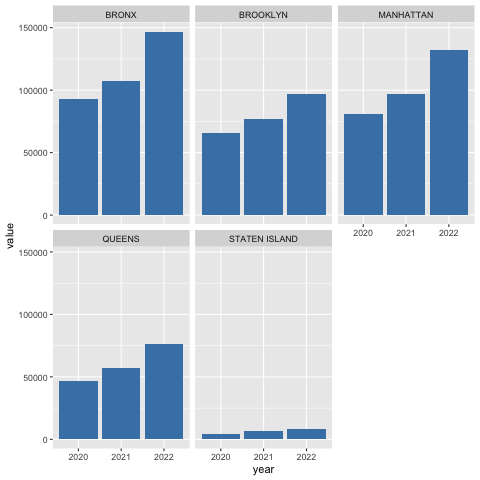

In [17]:
%%R -i df_long

df_long %>%
    group_by(year, borough) %>%
    summarise(value = sum(value))

    ggplot(df_long, aes(x = year, y = value)) +
    facet_wrap(~borough) +
    geom_bar(stat = "identity", fill = "steelblue") 


In [18]:
%%R -i df_long

model <- lm(value ~ year, data=df_long)
summary(model)



Call:
lm(formula = value ~ year, data = df_long)

Residuals:
   Min     1Q Median     3Q    Max 
-83966 -13630   7526  31355  54750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    58019      19594   2.961   0.0119 *
year2021       10946      27710   0.395   0.6998  
year2022       34105      27710   1.231   0.2420  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43810 on 12 degrees of freedom
Multiple R-squared:  0.1163,	Adjusted R-squared:  -0.03096 
F-statistic: 0.7898 on 2 and 12 DF,  p-value: 0.4762



The p-value is smaller than 0.05 (0.0119) but it is not too small. But there seems to be a statistical relationship between year and complaints thus, the increase in complaints is not by chance alone. 

However, this model only explains about 11% of the varience which means that there could be other factors that are not included in the model that could better explain the increase in complaints.

### Taking income into account

In [19]:
df_borough = pd.read_csv('borough_adjusted.csv')
df_borough

,year,borough,complaints_norm,median_income
0,2020,Bronx,92589,41895
1,2020,Brooklyn,65545,63973
2,2020,Manhattan,80578,89812
3,2020,Queens,46942,72028
4,2020,Staten Island,4439,85381
5,2021,Bronx,107351,43011
6,2021,Brooklyn,76928,67567
7,2021,Manhattan,97104,84435
8,2021,Queens,57143,73262
9,2021,Staten Island,6297,86054


H0: There is no relationship between median_income and complaints (normalized by population).

H1: There is a relationship between median_income and complaints (normalized by population).

`geom_smooth()` using formula = 'y ~ x'


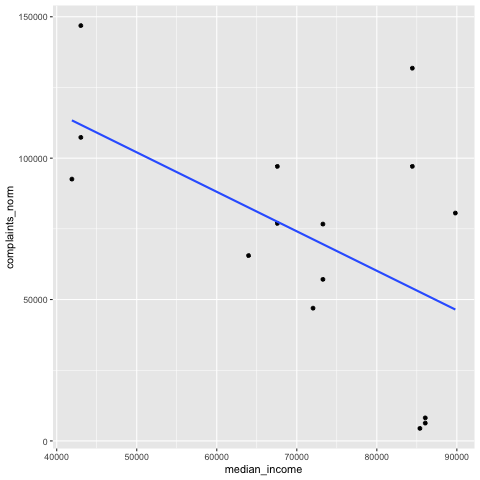

In [20]:
%%R -i df_borough

ggplot(df_borough, aes(x = median_income, y = complaints_norm)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) 

In [21]:
%%R -i df_borough

model <- lm(complaints_norm ~ median_income, data=df_borough)
summary(model)



Call:
lm(formula = complaints_norm ~ median_income, data = df_borough)

Residuals:
   Min     1Q Median     3Q    Max 
-48214 -22569  -4463  26839  77839 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    1.719e+05  4.402e+04   3.904  0.00181 **
median_income -1.396e+00  6.065e-01  -2.302  0.03850 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37740 on 13 degrees of freedom
Multiple R-squared:  0.2896,	Adjusted R-squared:  0.235 
F-statistic:   5.3 on 1 and 13 DF,  p-value: 0.0385



The p-value is really small which means that there is a statistically significant relationship between median_income and complaints (normalized by population). The model explains about 30% of the varience. 

## Zip code analysis

In [22]:
df_zip = pd.read_csv('zip_adjusted.csv')
df_zip

,year,borough,zip,complaints,pop,complaints_norm,median_income
0,2020,MANHATTAN,10001,289,25026,1154.799009,96787
1,2020,MANHATTAN,10002,1067,74363,1434.853354,35607
2,2020,MANHATTAN,10003,824,54671,1507.197600,129981
3,2020,MANHATTAN,10004,8,3310,241.691843,204949
4,2020,MANHATTAN,10005,3,8664,34.626039,184681
...,...,...,...,...,...,...,...
535,2022,QUEENS,11436,173,21248,814.194277,78306
536,2022,QUEENS,11691,1619,70797,2286.820063,54877
537,2022,QUEENS,11692,470,24639,1907.544949,53498
538,2022,QUEENS,11693,146,14147,1032.020923,64688


`geom_smooth()` using formula = 'y ~ x'


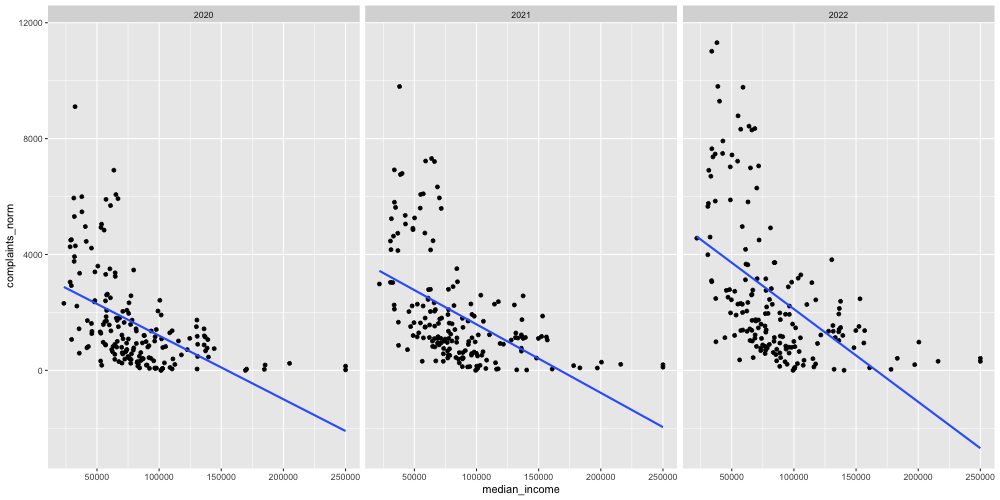

In [23]:
%%R -i df_zip -w 1000 -h 500

ggplot(df_zip, aes(x = median_income, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [24]:
%%R -i df_zip

model <- lm(complaints_norm ~ median_income, data=df_zip)
summary(model)


Call:
lm(formula = complaints_norm ~ median_income, data = df_zip)

Residuals:
    Min      1Q  Median      3Q     Max 
-2677.2 -1348.7  -540.9   778.7  8100.1 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.181e+03  1.860e+02   22.48   <2e-16 ***
median_income -2.549e-02  1.995e-03  -12.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1832 on 538 degrees of freedom
Multiple R-squared:  0.2328,	Adjusted R-squared:  0.2314 
F-statistic: 163.2 on 1 and 538 DF,  p-value: < 2.2e-16



In [25]:
df_zip

,year,borough,zip,complaints,pop,complaints_norm,median_income
0,2020,MANHATTAN,10001,289,25026,1154.799009,96787
1,2020,MANHATTAN,10002,1067,74363,1434.853354,35607
2,2020,MANHATTAN,10003,824,54671,1507.197600,129981
3,2020,MANHATTAN,10004,8,3310,241.691843,204949
4,2020,MANHATTAN,10005,3,8664,34.626039,184681
...,...,...,...,...,...,...,...
535,2022,QUEENS,11436,173,21248,814.194277,78306
536,2022,QUEENS,11691,1619,70797,2286.820063,54877
537,2022,QUEENS,11692,470,24639,1907.544949,53498
538,2022,QUEENS,11693,146,14147,1032.020923,64688


## Borough-wise

`geom_smooth()` using formula = 'y ~ x'


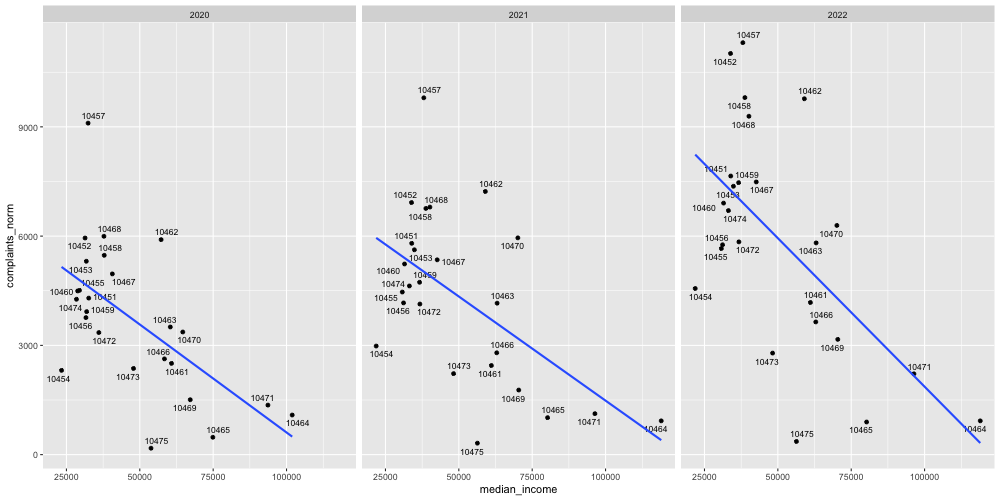

In [26]:
%%R -i df_zip -w 1000 -h 500

df_zip %>%
    filter(borough == 'BRONX') %>%
    ggplot(aes(x = median_income, y = complaints_norm)) +
    # label points with zip code
    geom_text_repel(aes(label = zip), size = 3) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)



Further reporting:

1. Zip code 10457 stands out - It has over 9,000 complaints every year. Why is that? Check which addresses in that zip code have the most complaints.

2. Other zip codes with consistently high complaints - 10452, 10458, 10462, 10468. 

3. This is the highest across all zip codes in all boroughs. 



In [27]:
# df_address = pd.read_csv('address_level.csv')
# df_address

,year,borough,zip,incident_address,lat,long,num_complaints
0,2020,BRONX,10451,1020 GRAND CONCOURSE,40.830314,-73.920785,1
1,2020,BRONX,10451,109 EAST 153 STREET,40.823932,-73.928033,108
2,2020,BRONX,10451,175 EAST 151 STREET,40.820882,-73.927299,2
3,2020,BRONX,10451,180 EAST 162 STREET,40.827449,-73.921442,2
4,2020,BRONX,10451,180 EAST 163 STREET,40.828272,-73.920754,2
...,...,...,...,...,...,...,...
106127,2022,STATEN ISLAND,10314,81 CHURCH AVENUE,40.592844,-74.185280,1
106128,2022,STATEN ISLAND,10314,90 RICHMOND HILL ROAD,40.587616,-74.165297,1
106129,2022,STATEN ISLAND,10314,90 RICHMOND HILL ROAD,40.587651,-74.165359,5
106130,2022,STATEN ISLAND,10314,98 NOSTRAND AVENUE,40.606914,-74.169706,1


In [34]:
# save as parquet

# df_address.to_parquet('address_level.parquet')

In [36]:
df_address = pd.read_parquet('address_level.parquet')
df_address

,year,borough,zip,incident_address,lat,long,num_complaints
0,2020,BRONX,10451,1020 GRAND CONCOURSE,40.830314,-73.920785,1
1,2020,BRONX,10451,109 EAST 153 STREET,40.823932,-73.928033,108
2,2020,BRONX,10451,175 EAST 151 STREET,40.820882,-73.927299,2
3,2020,BRONX,10451,180 EAST 162 STREET,40.827449,-73.921442,2
4,2020,BRONX,10451,180 EAST 163 STREET,40.828272,-73.920754,2
...,...,...,...,...,...,...,...
106127,2022,STATEN ISLAND,10314,81 CHURCH AVENUE,40.592844,-74.185280,1
106128,2022,STATEN ISLAND,10314,90 RICHMOND HILL ROAD,40.587616,-74.165297,1
106129,2022,STATEN ISLAND,10314,90 RICHMOND HILL ROAD,40.587651,-74.165359,5
106130,2022,STATEN ISLAND,10314,98 NOSTRAND AVENUE,40.606914,-74.169706,1


In [28]:
# which addresses have the most complaints year-wise?

df_address.groupby(['incident_address', 'year', 'borough', 'zip']).agg({'num_complaints': 'sum'}).sort_values(by=['num_complaints'], ascending=False).head(20)

num_complaints
incident_address              year borough   zip                  
2176 TIEBOUT AVENUE           2021 BRONX     10457            3707
                              2022 BRONX     10457            3310
                              2020 BRONX     10457            3242
957 WOODYCREST AVENUE         2022 BRONX     10452            1423
89-21 ELMHURST AVENUE         2020 QUEENS    11373            1369
2040 BRONXDALE AVENUE         2020 BRONX     10462            1242
31-35 CRESCENT STREET         2022 QUEENS    11106            1172
9511 SHORE ROAD               2020 BROOKLYN  11209            1141
2040 BRONXDALE AVENUE         2021 BRONX     10462            1103
                              2022 BRONX     10462             933
2664 GRAND CONCOURSE          2021 BRONX     10458             833
9511 SHORE ROAD               2021 BROOKLYN  11209             821
932 ADEE AVENUE               2022 BRONX     10469             768
2664 GRAND CONCOURSE          2020 BRONX     10458             687
430 61 STREET                 2021 BROOKLYN  11220             667
2664 GRAND CONCOURSE          2022 BRONX     10458             659
1425 DR M L KING JR BOULEVARD 2020 BRONX     10452             613
357 EAST  201 STREET          2022 BRONX     10458             600
252 SHERMAN AVENUE            2020 MANHATTAN 10034             566
919 PROSPECT AVENUE           2022 BRONX     10459             560

In [29]:
# which addresses have the most complaints overall?

df_address.groupby(['incident_address', 'borough', 'zip']).agg({'num_complaints': 'sum'}).sort_values(by=['num_complaints'], ascending=False).head(20)

,,,num_complaints
incident_address,borough,zip,
2176 TIEBOUT AVENUE,BRONX,10457,10259
2040 BRONXDALE AVENUE,BRONX,10462,3278
9511 SHORE ROAD,BROOKLYN,11209,2427
2664 GRAND CONCOURSE,BRONX,10458,2179
957 WOODYCREST AVENUE,BRONX,10452,2148
89-21 ELMHURST AVENUE,QUEENS,11373,1507
430 61 STREET,BROOKLYN,11220,1377
31-35 CRESCENT STREET,QUEENS,11106,1369
1425 DR M L KING JR BOULEVARD,BRONX,10452,1095


2176 TIEBOUT AVENUE	is a massive outlier - futher reporting 

`geom_smooth()` using formula = 'y ~ x'


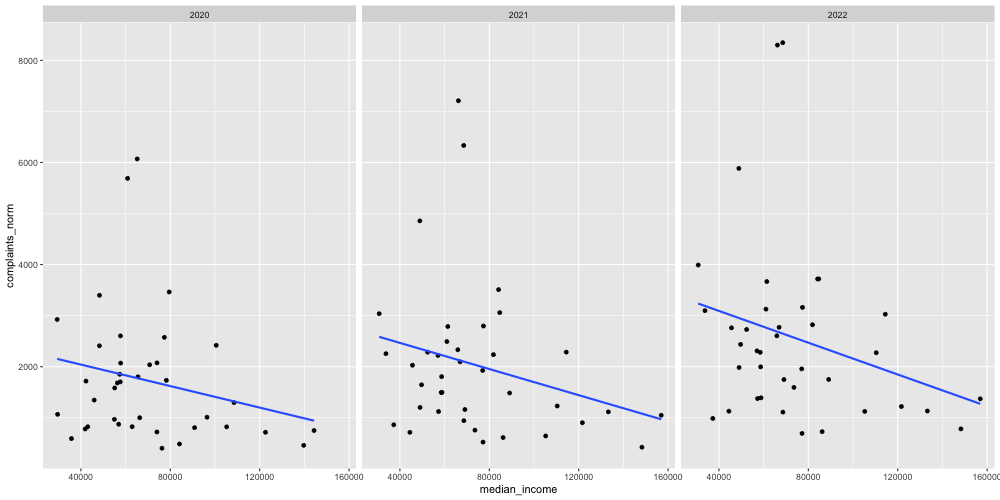

In [30]:
%%R -i df_zip -w 1000 -h 500

df_zip %>%
    filter(borough == 'BROOKLYN') %>%
    ggplot(aes(x = median_income, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


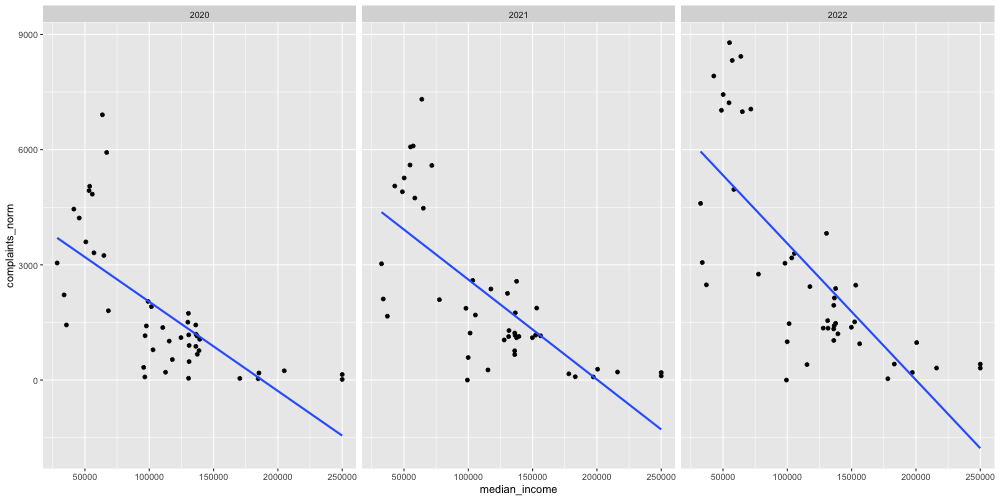

In [31]:
%%R -i df_zip -w 1000 -h 500

df_zip %>%
    filter(borough == 'MANHATTAN') %>%
    ggplot(aes(x = median_income, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


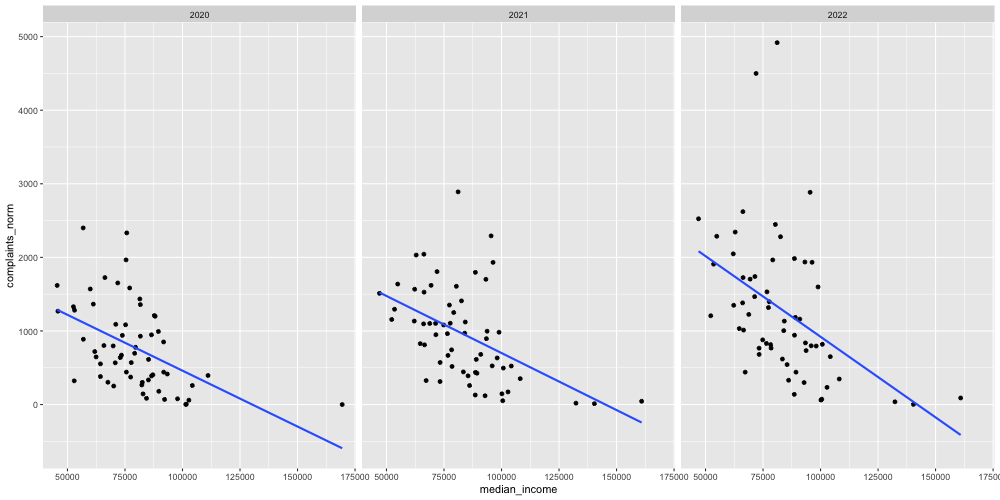

In [32]:
%%R -i df_zip -w 1000 -h 500

df_zip %>%
    filter(borough == 'QUEENS') %>%
    ggplot(aes(x = median_income, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


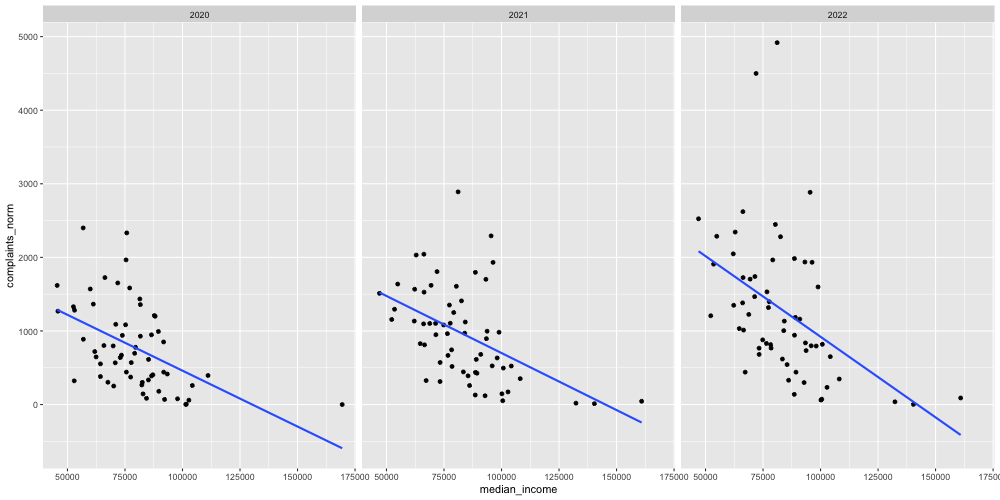

In [33]:
%%R -i df_zip -w 1000 -h 500

df_zip %>%
    filter(borough == 'QUEENS') %>%
    ggplot(aes(x = median_income, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)